In [1]:
import pandas as pd
from WindPy import w
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!
You can use w.menu to help yourself to create commands(WSD,WSS,WST,WSI,WSQ,...)!

COPYRIGHT (C) 2016 WIND HONGHUI INFORMATION & TECHKNOLEWDGE CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [3]:
def wind2df(raw_data):
    dic = {}
    for data, field in zip(raw_data.Data, raw_data.Fields):
        dic[str(field.lower())] = data
    return pd.DataFrame(dic, index=raw_data.Times)

In [27]:
data = w.wsd('881001.WI', 'close, volume', '2014-01-01', '2017-05-12')

In [28]:
df = wind2df(data)

In [29]:
df.tail()

,close,volume
2017-05-08 00:00:00.005,4145.8450,3.440036e+10
2017-05-09 00:00:00.005,4159.1516,2.732920e+10
2017-05-10 00:00:00.005,4108.8953,3.165134e+10
2017-05-11 00:00:00.005,4108.8766,3.640859e+10
2017-05-12 00:00:00.005,4125.7726,3.002324e+10


In [30]:
df['obv'] = 0

In [31]:
for i in range(df.shape[0]):
    if i > 0:
        if df.ix[i, 'close'] > df.ix[i - 1, 'close']:
            df.ix[i, 'obv'] = df.ix[i - 1, 'obv'] + df.ix[i, 'volume']
        else:
            df.ix[i, 'obv'] = df.ix[i - 1, 'obv'] - df.ix[i, 'volume']

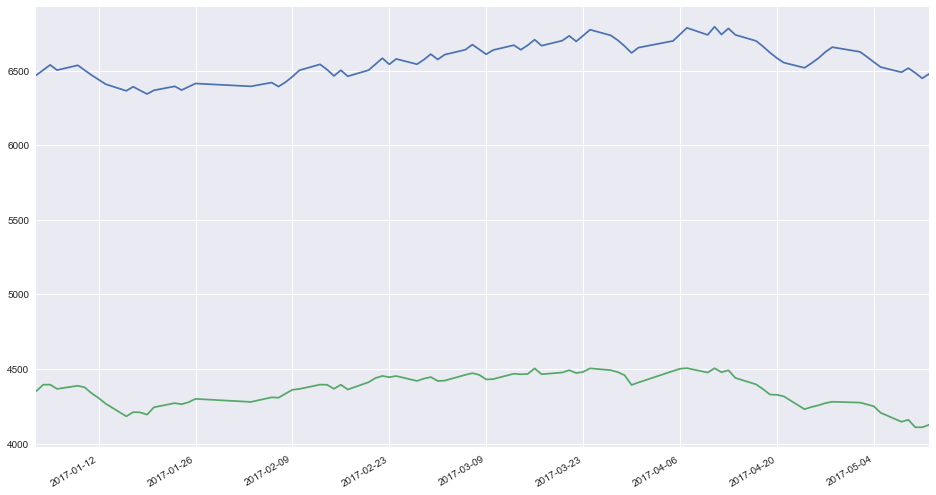

In [43]:
plt.figure(figsize=(16, 9))
(df[df.index >= '2017-01-01']['obv'] / 1000000000).plot()
df[df.index >= '2017-01-01']['close'].plot()

In [33]:
df['ret'] = df['close'].pct_change(20).shift(-20)

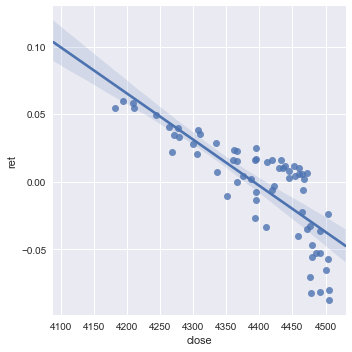

In [44]:
sns.lmplot(x='obv', y='ret', data=df[df.index >= '2017-01-01'])